In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import ipywidgets as widgets

from IPython.display import display, clear_output

In [ ]:
print("\n1. DATA LOADING & INITIAL INSPECTION …………………………………………")

url = "https://drive.google.com/uc?export=download&id=1dUGqIL0sC0N0Jx3pHderEVqNAfoqTP8S"
df = pd.read_csv(url)


1. DATA LOADING & INITIAL INSPECTION …………………………………………


In [ ]:
df

,category,text
0,Politics,The upcoming election is expected to have high...
1,AI,Generative AI tools are changing the way conte...
2,Climate Change,Renewable energy adoption is crucial for a sus...
3,Health,Doctors emphasize the importance of regular he...
4,Health,Mental health awareness is growing among teena...
...,...,...
995,Climate Change,Renewable energy adoption is crucial for a sus...
996,Sports,Olympic preparations are in full swing amid fu...
997,Entertainment,The new blockbuster movie broke box office rec...
998,Politics,The upcoming election is expected to have high...


In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
def cleaned_data(text):
    text=text.lower()
    text=re.sub(r'ttp\S+|www.\S+]','',text)
    text=re.sub(r'[^a-z\s]','',text)
    tokens=text.split()
    tokens=[word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return ''.join(tokens)

df['clean_data']=df['text'].apply(cleaned_data)

In [ ]:
df.head()

,category,text,clean_data
0,Politics,The upcoming election is expected to have high...,upcomingelectionexpectedhighvoterturnout
1,AI,Generative AI tools are changing the way conte...,generativeaitoolschangingwaycontentcreated
2,Climate Change,Renewable energy adoption is crucial for a sus...,renewableenergyadoptioncrucialsustainablefuture
3,Health,Doctors emphasize the importance of regular he...,doctorsemphasizeimportanceregularhealthcheckups
4,Health,Mental health awareness is growing among teena...,mentalhealthawarenessgrowingteenagers


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer(max_df=0.95,min_df=2, stop_words='english')
tfidf = vector.fit_transform(df['clean_data'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=42)  # 10 topics
lda.fit(tfidf)


LatentDirichletAllocation(random_state=42)

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf)


NMF(n_components=10, random_state=42)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}: ", " | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Feature names = words
feature_names = vector.get_feature_names_out()

print("\n--- LDA Topics ---")
display_topics(lda, feature_names, 10)

print("\n--- NMF Topics ---")
display_topics(nmf, feature_names, 10)



--- LDA Topics ---
Topic 1:  injuriesplagueteamsaheadplayoffs | risingsealevelsthreatencoastalcitiesglobally | newvaccineshowspromisepreventingseasonalflu | renewableenergyadoptioncrucialsustainablefuture | championshipgameendedthrillinglastminutegoal | debatesimmigrationpoliciescontinueparliament | upcomingelectionexpectedhighvoterturnout | celebritiesuseplatformssupportsocialcauses | governmentannouncesnewtaxreformsmiddleclassfamilies | aitransformingindustrieshealthcarefinance
Topic 2:  openaisgptmodelintegratedproducts | climateactivistsurgegovernmentsactfasteremissions | newvaccineshowspromisepreventingseasonalflu | renewableenergyadoptioncrucialsustainablefuture | championshipgameendedthrillinglastminutegoal | debatesimmigrationpoliciescontinueparliament | upcomingelectionexpectedhighvoterturnout | celebritiesuseplatformssupportsocialcauses | aitransformingindustrieshealthcarefinance | governmentannouncesnewtaxreformsmiddleclassfamilies
Topic 3:  streamingplatformscompetingexclu

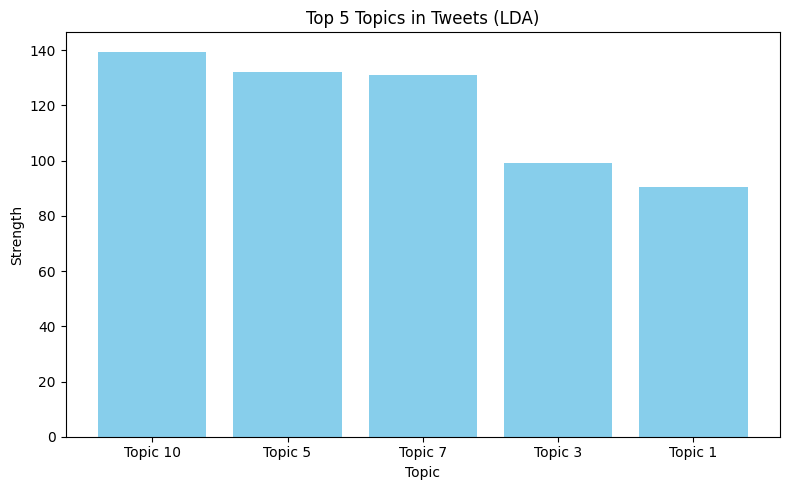

In [ ]:
lda_topic_strength = lda.transform(tfidf)
topic_sums = np.sum(lda_topic_strength, axis=0)

top5_topics = topic_sums.argsort()[-5:][::-1]
top5_values = topic_sums[top5_topics]
top5_labels = [f"Topic {i+1}" for i in top5_topics]

plt.figure(figsize=(8, 5))
plt.bar(top5_labels, top5_values, color='skyblue')
plt.title("Top 5 Topics in Tweets (LDA)")
plt.xlabel("Topic")
plt.ylabel("Strength")
plt.tight_layout()
plt.show()


In [ ]:
!pip install wordcloud ipywidgets matplotlib

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt # Assuming you're also using matplotlib for plotting

In [ ]:
from ipywidgets import widgets

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Make sure your data is loaded

# Clean the text (in case it’s not already)
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# Create word frequency dictionary
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
words = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1
word_freq = dict(zip(words, counts))


Dropdown(description='Select word:', index=133, layout=Layout(width='50%'), options=('act', 'activists', 'adop…

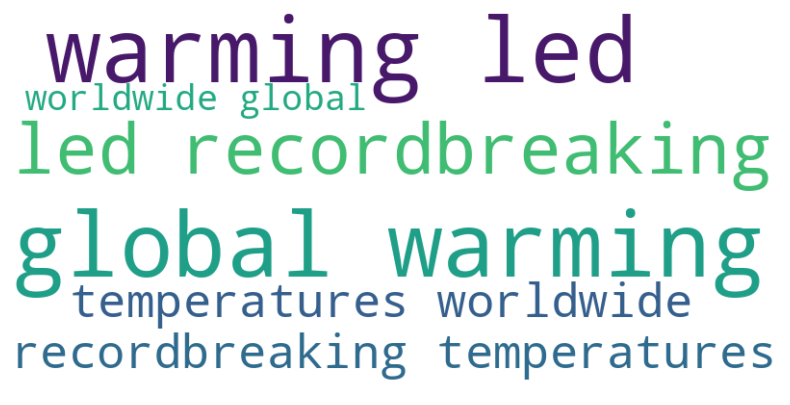


Tweets containing “worldwide”:
1. Global warming has led to record-breaking temperatures worldwide.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets

# Make sure you already have df['clean_text'] computed

def show_wordcloud_and_tweets(word):
    clear_output(wait=True)
    display(dropdown)

    # filter tweets containing the selected word
    subset = df[df['clean_text'].str.contains(fr'\b{word}\b', case=False, regex=True)]
    text = " ".join(subset['clean_text'].tolist()) or word  # fallback to word itself

    # generate and show cloud
    wc = WordCloud(width=800, height=400, background_color='white')\
             .generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    # show up to 10 matching original tweets
    print(f"\nTweets containing “{word}”:")
    for i, tweet in enumerate(subset['text'].drop_duplicates().head(10), 1):
        print(f"{i}. {tweet}")

# dropdown of all words
dropdown = widgets.Dropdown(
    options=sorted(word_freq.keys()),
    description='Select word:',
    layout=widgets.Layout(width='50%')
)

# hook up the callback
dropdown.observe(
    lambda change: show_wordcloud_and_tweets(change['new'])
    if change['type']=='change' and change['name']=='value' else None
)

# initial display
display(dropdown)
show_wordcloud_and_tweets(dropdown.value)